                                          Hot Water Consumption Anomaly Detection Project

The dataset basically contain the time series dataset as it also consist of the timestamp column. Almost all the columns are the nummerical sensor readings which basically consist of the float values. 

the dataset basically shows the hot water consumption of the differet buildings, different systems or units and also ist recorded hourly over time. 

Here, in this anomaly detection we will be mainly using 3 ML models which are as: 

1. Isolation Forest : This is basically used for the detection of the global anomalies. 

2. Local Outlier Factor : This is basically used for the detection of the local anomalies. 

3. Robust Covariance ; This Ml algorithm is used for the detection of the ststitical anomalies. 

In [2]:
# iimporting the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Loading the whole data 

data = pd.read_csv("hotwater.csv") 
data 

,timestamp,Robin_public_Carolina,Robin_office_Wai,Robin_office_Zelma,Robin_office_Lindsay,Robin_education_Derick,Robin_education_Cecilia,Robin_education_Della,Robin_education_Leslie,Robin_education_Margarito,...,Eagle_assembly_Josie,Eagle_office_Elvis,Eagle_office_Remedios,Eagle_public_Minnie,Eagle_education_Luther,Eagle_education_Paul,Eagle_assembly_Margret,Eagle_office_Marisela,Cockatoo_education_Orlando,Cockatoo_assembly_Ralph
0,2016-01-01 00:00:00,0.2421,0.0,0.0000,9.7989,299.7292,19.6809,0.000,100.0000,200.0000,...,49614.2534,0.0000,99042.9342,88807.8984,4.407788e+05,13864.4856,578905.8426,0.0000,24879.6480,1126.1133
1,2016-01-01 01:00:00,9.7579,100.0,0.0000,10.0000,593.0020,30.0000,10.000,300.0000,300.0000,...,89058.9137,0.0000,116537.7782,136295.2183,6.880721e+05,13162.7857,700044.4544,0.0000,24978.2604,1155.4537
2,2016-01-01 02:00:00,0.0000,100.0,0.0000,10.0000,600.0000,30.2273,10.000,300.0000,300.0000,...,87540.7180,0.0000,64431.0439,123022.5016,6.042245e+05,14204.0377,511044.9594,0.0000,31489.1536,982.4781
3,2016-01-01 03:00:00,0.0000,0.0,100.0000,10.0000,600.0000,29.9995,10.000,300.0000,300.0000,...,90272.3742,0.0000,71352.0328,147342.8520,6.252376e+05,13343.8743,377248.9334,0.0000,23195.5248,1145.8003
4,2016-01-01 04:00:00,10.0000,100.0,201.8749,10.0000,600.0000,39.7732,0.000,300.0000,304.0667,...,86648.2875,0.0000,246560.8668,154392.9387,6.247980e+05,13615.4925,457317.0443,0.0000,22686.2069,1170.1021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,...,277584.2491,201136.0633,275790.8891,164254.7485,9.942549e+05,205495.5238,627746.9160,221551.3599,65267.8180,751.6208
17540,2017-12-31 20:00:00,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,...,272760.9746,201807.5183,277562.0930,189692.7545,1.066413e+06,190916.5310,674369.3247,316145.8280,67226.9644,741.8222
17541,2017-12-31 21:00:00,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,...,282110.4377,178769.1191,276313.1709,197492.0478,1.050672e+06,187370.1082,614498.8466,290548.9775,65531.1351,637.4618
17542,2017-12-31 22:00:00,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,...,287500.5995,175986.8495,273639.5135,165657.0639,1.059426e+06,195726.9105,562389.2988,271739.7687,66289.2843,753.9201


Now, we will be making the analysis over the whole data, so that the further pre processing can be taken place. 

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 186 entries, timestamp to Cockatoo_assembly_Ralph
dtypes: float64(185), object(1)
memory usage: 24.9+ MB


In [5]:
data.describe() 

,Robin_public_Carolina,Robin_office_Wai,Robin_office_Zelma,Robin_office_Lindsay,Robin_education_Derick,Robin_education_Cecilia,Robin_education_Della,Robin_education_Leslie,Robin_education_Margarito,Robin_public_Cami,...,Eagle_assembly_Josie,Eagle_office_Elvis,Eagle_office_Remedios,Eagle_public_Minnie,Eagle_education_Luther,Eagle_education_Paul,Eagle_assembly_Margret,Eagle_office_Marisela,Cockatoo_education_Orlando,Cockatoo_assembly_Ralph
count,17540.000000,8769.000000,8782.000000,17542.000000,17527.000000,17543.000000,17540.000000,17544.000000,17544.000000,17541.000000,...,17544.000000,17544.000000,17544.000000,17512.000000,1.754400e+04,17544.000000,1.750200e+04,1.754400e+04,15865.000000,16095.000000
mean,20.108563,36.270493,50.311436,8.132144,402.104458,36.456963,3.528266,174.231652,188.001637,43.340139,...,87029.272962,24101.845553,79518.507137,125094.959536,3.780360e+05,27674.581679,2.944175e+05,8.746668e+04,18761.959879,923.406497
std,31.956571,108.974522,87.497676,10.192097,240.292094,21.573668,6.184908,166.262873,295.460006,58.719304,...,87548.588538,39928.242477,102007.261496,60629.705381,3.083870e+05,30779.293235,1.710922e+05,2.492250e+05,17013.339023,595.665788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,225.523850,20.000000,0.000000,0.000000,100.000000,0.000000,...,18487.006575,0.000000,0.000000,89335.631325,1.436048e+05,7232.171700,1.758380e+05,0.000000e+00,5667.478300,621.957900
50%,6.779100,0.000000,0.000000,2.239700,359.561400,30.626000,0.000000,197.456600,194.505300,0.000000,...,58270.281200,0.000000,0.000000,111773.073800,2.986833e+05,14170.070800,2.841320e+05,0.000000e+00,11878.372200,764.300500
75%,30.000000,0.000000,100.000000,13.620125,570.541200,52.954700,7.774300,300.000000,246.383200,100.000000,...,135774.306550,40495.788800,152826.063900,151548.538100,5.141343e+05,42692.597725,4.018891e+05,0.000000e+00,29154.342900,965.917800
max,365.855200,700.348600,700.000000,160.000000,12939.129400,376.773200,40.000000,9400.000000,23000.000000,1200.000000,...,473208.057300,438214.236900,813925.075100,480270.101300,1.857748e+06,260027.860200,2.315032e+06,2.586613e+06,94464.789000,4307.295100


In [6]:
data.shape 

(17544, 186)

In [ ]:
for col in data.columns: 
    print(col)  

# Here we are basically printing all the data columns 

timestamp
Robin_public_Carolina
Robin_office_Wai
Robin_office_Zelma
Robin_office_Lindsay
Robin_education_Derick
Robin_education_Cecilia
Robin_education_Della
Robin_education_Leslie
Robin_education_Margarito
Robin_public_Cami
Robin_education_Mercedes
Robin_education_Audrea
Robin_education_Karyl
Robin_education_Madeline
Robin_office_Adolph
Fox_lodging_Stephen
Fox_lodging_Stephan
Fox_education_Lilly
Fox_education_Gayla
Fox_lodging_Warren
Fox_education_Andre
Fox_retail_Manie
Fox_assembly_Emma
Fox_lodging_Frances
Fox_office_Alice
Fox_education_Leota
Fox_assembly_Adrianne
Fox_lodging_Morris
Fox_education_Theodore
Fox_assembly_Gary
Fox_education_Dewayne
Fox_assembly_Johnnie
Fox_education_Jacqueline
Fox_education_Yolande
Fox_assembly_Renna
Fox_lodging_Wallace
Fox_education_John
Fox_utility_Marian
Fox_education_Sterling
Fox_lodging_Isabell
Fox_education_Ollie
Fox_education_Elois
Fox_education_Melinda
Fox_education_Geoffrey
Fox_lodging_Angla
Fox_assembly_Cathy
Fox_education_Gloria
Fox_education_

In [ ]:
# Now,  we need to look for the empty values in the dataset, whcih will take place as 

data.isnull().sum()  

# here, as we can see taht there are a lot of empty values 

timestamp                        0
Robin_public_Carolina            4
Robin_office_Wai              8775
Robin_office_Zelma            8762
Robin_office_Lindsay             2
                              ... 
Eagle_education_Paul             0
Eagle_assembly_Margret          42
Eagle_office_Marisela            0
Cockatoo_education_Orlando    1679
Cockatoo_assembly_Ralph       1449
Length: 186, dtype: int64

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp']) 

data['timestamp']  

# The data has been converted to timestamp 

0       2016-01-01 00:00:00
1       2016-01-01 01:00:00
2       2016-01-01 02:00:00
3       2016-01-01 03:00:00
4       2016-01-01 04:00:00
                ...        
17539   2017-12-31 19:00:00
17540   2017-12-31 20:00:00
17541   2017-12-31 21:00:00
17542   2017-12-31 22:00:00
17543   2017-12-31 23:00:00
Name: timestamp, Length: 17544, dtype: datetime64[ns]

Even though, we have converted the timestamp to the datetime numeric format, but still in order to carry out the Anomaly detection, we need to remove the timestamp column so as to carry out the further processing. 

In [11]:
x = data.drop(['timestamp'], axis = 1) 
x 

,Robin_public_Carolina,Robin_office_Wai,Robin_office_Zelma,Robin_office_Lindsay,Robin_education_Derick,Robin_education_Cecilia,Robin_education_Della,Robin_education_Leslie,Robin_education_Margarito,Robin_public_Cami,...,Eagle_assembly_Josie,Eagle_office_Elvis,Eagle_office_Remedios,Eagle_public_Minnie,Eagle_education_Luther,Eagle_education_Paul,Eagle_assembly_Margret,Eagle_office_Marisela,Cockatoo_education_Orlando,Cockatoo_assembly_Ralph
0,0.2421,0.0,0.0000,9.7989,299.7292,19.6809,0.000,100.0000,200.0000,0.0000,...,49614.2534,0.0000,99042.9342,88807.8984,4.407788e+05,13864.4856,578905.8426,0.0000,24879.6480,1126.1133
1,9.7579,100.0,0.0000,10.0000,593.0020,30.0000,10.000,300.0000,300.0000,200.0000,...,89058.9137,0.0000,116537.7782,136295.2183,6.880721e+05,13162.7857,700044.4544,0.0000,24978.2604,1155.4537
2,0.0000,100.0,0.0000,10.0000,600.0000,30.2273,10.000,300.0000,300.0000,100.0000,...,87540.7180,0.0000,64431.0439,123022.5016,6.042245e+05,14204.0377,511044.9594,0.0000,31489.1536,982.4781
3,0.0000,0.0,100.0000,10.0000,600.0000,29.9995,10.000,300.0000,300.0000,200.0000,...,90272.3742,0.0000,71352.0328,147342.8520,6.252376e+05,13343.8743,377248.9334,0.0000,23195.5248,1145.8003
4,10.0000,100.0,201.8749,10.0000,600.0000,39.7732,0.000,300.0000,304.0667,100.0000,...,86648.2875,0.0000,246560.8668,154392.9387,6.247980e+05,13615.4925,457317.0443,0.0000,22686.2069,1170.1021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,95.5625,...,277584.2491,201136.0633,275790.8891,164254.7485,9.942549e+05,205495.5238,627746.9160,221551.3599,65267.8180,751.6208
17540,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,95.5625,...,272760.9746,201807.5183,277562.0930,189692.7545,1.066413e+06,190916.5310,674369.3247,316145.8280,67226.9644,741.8222
17541,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,95.5625,...,282110.4377,178769.1191,276313.1709,197492.0478,1.050672e+06,187370.1082,614498.8466,290548.9775,65531.1351,637.4618
17542,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,95.5625,...,287500.5995,175986.8495,273639.5135,165657.0639,1.059426e+06,195726.9105,562389.2988,271739.7687,66289.2843,753.9201


Now, as we saw above that there are a lot of missing or empty values in the whole data, whcih needs to be filled 

In [13]:
x = x.apply(pd.to_numeric, errors = 'coerce') 
x  = x.fillna(x.mean()) 
x 

,Robin_public_Carolina,Robin_office_Wai,Robin_office_Zelma,Robin_office_Lindsay,Robin_education_Derick,Robin_education_Cecilia,Robin_education_Della,Robin_education_Leslie,Robin_education_Margarito,Robin_public_Cami,...,Eagle_assembly_Josie,Eagle_office_Elvis,Eagle_office_Remedios,Eagle_public_Minnie,Eagle_education_Luther,Eagle_education_Paul,Eagle_assembly_Margret,Eagle_office_Marisela,Cockatoo_education_Orlando,Cockatoo_assembly_Ralph
0,0.2421,0.000000,0.000000,9.7989,299.7292,19.6809,0.000,100.0000,200.0000,0.0000,...,49614.2534,0.0000,99042.9342,88807.8984,4.407788e+05,13864.4856,578905.8426,0.0000,24879.6480,1126.1133
1,9.7579,100.000000,0.000000,10.0000,593.0020,30.0000,10.000,300.0000,300.0000,200.0000,...,89058.9137,0.0000,116537.7782,136295.2183,6.880721e+05,13162.7857,700044.4544,0.0000,24978.2604,1155.4537
2,0.0000,100.000000,0.000000,10.0000,600.0000,30.2273,10.000,300.0000,300.0000,100.0000,...,87540.7180,0.0000,64431.0439,123022.5016,6.042245e+05,14204.0377,511044.9594,0.0000,31489.1536,982.4781
3,0.0000,0.000000,100.000000,10.0000,600.0000,29.9995,10.000,300.0000,300.0000,200.0000,...,90272.3742,0.0000,71352.0328,147342.8520,6.252376e+05,13343.8743,377248.9334,0.0000,23195.5248,1145.8003
4,10.0000,100.000000,201.874900,10.0000,600.0000,39.7732,0.000,300.0000,304.0667,100.0000,...,86648.2875,0.0000,246560.8668,154392.9387,6.247980e+05,13615.4925,457317.0443,0.0000,22686.2069,1170.1021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,6.7791,36.270493,50.311436,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,95.5625,...,277584.2491,201136.0633,275790.8891,164254.7485,9.942549e+05,205495.5238,627746.9160,221551.3599,65267.8180,751.6208
17540,6.7791,36.270493,50.311436,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,95.5625,...,272760.9746,201807.5183,277562.0930,189692.7545,1.066413e+06,190916.5310,674369.3247,316145.8280,67226.9644,741.8222
17541,6.7791,36.270493,50.311436,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,95.5625,...,282110.4377,178769.1191,276313.1709,197492.0478,1.050672e+06,187370.1082,614498.8466,290548.9775,65531.1351,637.4618
17542,6.7791,36.270493,50.311436,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,95.5625,...,287500.5995,175986.8495,273639.5135,165657.0639,1.059426e+06,195726.9105,562389.2988,271739.7687,66289.2843,753.9201


Now, we will be applying the standard scaler pre processing to carry out the further pre processing using the Standaed Scaler as: 

In [14]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 

scaled_data = sc.fit_transform(x) 

scaled_data = np.nan_to_num(scaled_data) 

Now, we will be training the models to apply the machine learning on the data. 

In [15]:
from sklearn.ensemble import IsolationForest 
iso_model = IsolationForest(contamination = 0.02, random_state = 42) 

iso_model 

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [ ]:
iso_pred = iso_model.fit_predict(scaled_data) 
iso_pred = np.where(iso_pred == -1,1,0) 

iso_pred  

# Here 0 stands for normal part and 1 stands for anomalies 

array([0, 0, 0, ..., 1, 1, 1], shape=(17544,))

In [20]:
from sklearn.neighbors import LocalOutlierFactor 
lof_model = LocalOutlierFactor(n_neighbors = 20, contamination = 0.02) 
lof_model 

,n_neighbors,20
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,contamination,0.02
,novelty,False
,n_jobs,None


In [21]:
lof_pred = lof_model.fit_predict(scaled_data) 
lof_pred = np.where(lof_pred == -1,1,0) 

lof_pred 

array([0, 0, 0, ..., 0, 0, 0], shape=(17544,))

In [23]:
from sklearn.covariance import EllipticEnvelope  

rc_model = EllipticEnvelope(contamination = 0.02, random_state = 42) 
rc_model 

,store_precision,True
,assume_centered,False
,support_fraction,None
,contamination,0.02
,random_state,42


In [24]:
rc_pred = rc_model.fit_predict(scaled_data) 
rc_pred  = np.where(rc_pred == -1,1,0) 

rc_pred 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:753: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], shape=(17544,))

Now, comes the part of combining the results of the total anomaly detections in the code. 

In [26]:
results = pd.DataFrame({
    "IsolationForest" : iso_pred, 
    "LOF" : lof_pred, 
    "Robust Covariance" : rc_pred
}) 

results['Final_Anomaly'] = (results.sum(axis = 1) >= 2).astype(int)  

results

,IsolationForest,LOF,Robust Covariance,Final_Anomaly
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,0,1,1
...,...,...,...,...
17539,1,0,0,0
17540,1,0,0,0
17541,1,0,0,0
17542,1,0,0,0


In [27]:
# Now, we will be combining the Final Anomaly to the  

data_result = data.copy() 

data_result['Final_Anomaly'] = results['Final_Anomaly'] 

data_result 

,timestamp,Robin_public_Carolina,Robin_office_Wai,Robin_office_Zelma,Robin_office_Lindsay,Robin_education_Derick,Robin_education_Cecilia,Robin_education_Della,Robin_education_Leslie,Robin_education_Margarito,...,Eagle_office_Elvis,Eagle_office_Remedios,Eagle_public_Minnie,Eagle_education_Luther,Eagle_education_Paul,Eagle_assembly_Margret,Eagle_office_Marisela,Cockatoo_education_Orlando,Cockatoo_assembly_Ralph,Final_Anomaly
0,2016-01-01 00:00:00,0.2421,0.0,0.0000,9.7989,299.7292,19.6809,0.000,100.0000,200.0000,...,0.0000,99042.9342,88807.8984,4.407788e+05,13864.4856,578905.8426,0.0000,24879.6480,1126.1133,0
1,2016-01-01 01:00:00,9.7579,100.0,0.0000,10.0000,593.0020,30.0000,10.000,300.0000,300.0000,...,0.0000,116537.7782,136295.2183,6.880721e+05,13162.7857,700044.4544,0.0000,24978.2604,1155.4537,0
2,2016-01-01 02:00:00,0.0000,100.0,0.0000,10.0000,600.0000,30.2273,10.000,300.0000,300.0000,...,0.0000,64431.0439,123022.5016,6.042245e+05,14204.0377,511044.9594,0.0000,31489.1536,982.4781,0
3,2016-01-01 03:00:00,0.0000,0.0,100.0000,10.0000,600.0000,29.9995,10.000,300.0000,300.0000,...,0.0000,71352.0328,147342.8520,6.252376e+05,13343.8743,377248.9334,0.0000,23195.5248,1145.8003,0
4,2016-01-01 04:00:00,10.0000,100.0,201.8749,10.0000,600.0000,39.7732,0.000,300.0000,304.0667,...,0.0000,246560.8668,154392.9387,6.247980e+05,13615.4925,457317.0443,0.0000,22686.2069,1170.1021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,...,201136.0633,275790.8891,164254.7485,9.942549e+05,205495.5238,627746.9160,221551.3599,65267.8180,751.6208,0
17540,2017-12-31 20:00:00,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,...,201807.5183,277562.0930,189692.7545,1.066413e+06,190916.5310,674369.3247,316145.8280,67226.9644,741.8222,0
17541,2017-12-31 21:00:00,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,...,178769.1191,276313.1709,197492.0478,1.050672e+06,187370.1082,614498.8466,290548.9775,65531.1351,637.4618,0
17542,2017-12-31 22:00:00,6.7791,NaN,NaN,21.2633,501.7360,30.5816,5.775,261.5243,406.4517,...,175986.8495,273639.5135,165657.0639,1.059426e+06,195726.9105,562389.2988,271739.7687,66289.2843,753.9201,0


In [ ]:
print("\nAnomaly counts") 

results['Final_Anomaly'].value_counts()  

# Here, as we can see that there are about 158 anomalies in thw whole data 


Anomaly counts


Final_Anomaly
0    17386
1      158
Name: count, dtype: int64

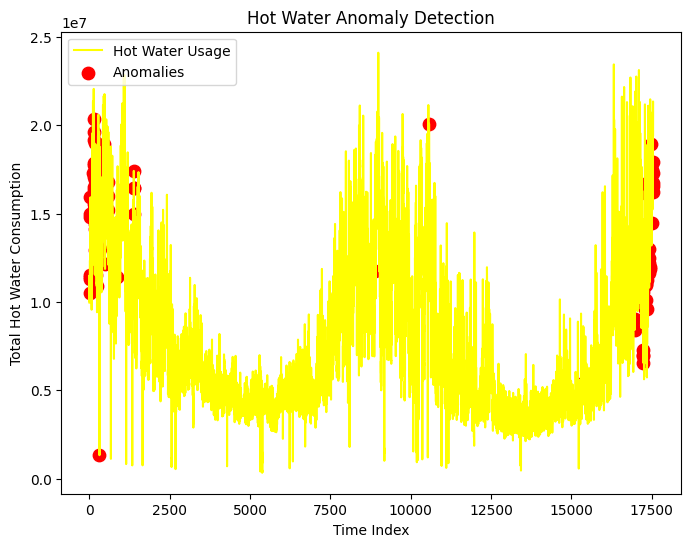

In [31]:
# Now, we will be plotting a line graph to show all the 158 anomalies in the data 

plt.figure(figsize = (8,6))  

total_usage = x.sum(axis = 1)  

plt.plot(total_usage, label = "Hot Water Usage", color = "yellow")  

anomalies = results['Final_Anomaly'] == 1  

plt.scatter(np.where(anomalies)[0],
            total_usage[anomalies],
            color = "red", 
            s = 80, 
            label = "Anomalies") 

plt.title("Hot Water Anomaly Detection") 
plt.xlabel("Time Index") 
plt.ylabel("Total Hot Water Consumption") 

plt.legend() 
plt.show() 

# Graph Explanation 

This graph shows the explanation of the usage of the Hot Water and the anomalies detected in the overall timestamps.  

The yellow lines basically show the usage of the usage of the overall hot water consumption. Here we can see an irregular pattern. There can be varous reasons for the very low consumption as: 

1. System Shutdown 
2. Sensor Failure 
3. Maintenance period  

In [32]:
# Saving thr results of the Final Anomaly 

data_result.to_csv("hot_water_data_anomaly_results.csv", index = False ) # This is done to remove the unwanted extra column and it does not save the index in file

print("\n✅ DONE! Results saved.")


✅ DONE! Results saved.


In [33]:
results.to_csv("hot_water_anomaly_model_results.csv", index = False)   

print("\n✅ DONE! Results saved.") 


✅ DONE! Results saved.
